In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

## 1.1
If we assume the picking process and the coin being unfair to be independent, we can write for the joint probability to pick the coin with label \$i\$ and the coin with the label \$j\$ being unfair:
\$
P_\textrm{pick, unfair}(i, j) = P_\textrm{pick}(i)P_\textrm{unfair}(j)
\$

Now, for the probability that the coin is unfair after picking a particular one, we get
\$
P_\textrm{unfair}(j | \text{pick}=i) = \frac{P_\textrm{pick, unfair}(i, j)}{P_\textrm{pick}(i)} = P_\textrm{unfair}(j)
\$

Assuming an uniform distribution for the unfair coin, for ten coins and one unfair one the probability that the picked coin is the unfair one is therefore
\$
P_\textrm{unfair} = \frac{1}{10}
\$

## 1.2


\$
P_\textrm{fair} = 1 - P_\textrm{unfair} = \frac{9}{10}
\$

\$
P_{\textrm{tails} | \textrm{fair}} = 0.5
\$

\$
P_\textrm{tails} = P_\textrm{fair}P_{\textrm{tails} | \textrm{fair}} + P_\textrm{unfair} = 0.55
\$

## 1.3

\$
P_{\textrm{unfair} | \textrm{tails}} = \frac{P_{\textrm{tails} | \textrm{unfair}} P_\textrm{unfair}}{P_\textrm{tails}} = \frac{P_\textrm{unfair}}{P_\textrm{tails}} = 0.181818
\$

## 1.4

Probability that the coin is unfair if the first toss gives tails: 0.187240


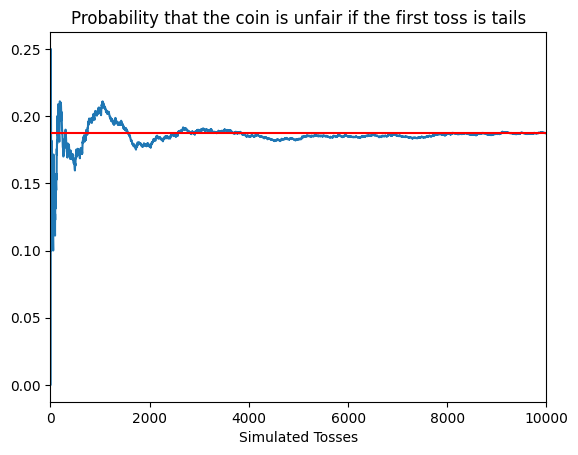

In [2]:
p_unfair = 1/10;       # probability that the selected coin is unfair
N = 10000          # number of trials
tails = np.zeros(N)   # number of tails
unfair = np.zeros(N)  # number of unfair coins (and automatically tails)

rng = np.random.default_rng()
# simulate all unfair toin coss
p = rng.uniform(size=N)
i = p < p_unfair
tails[i] = 1
unfair[i] = 1
# simulate all fair toin coss which give tails
p = rng.uniform(size=N)
i = (~i) & (p < 0.5)
tails[i] = 1
# count the number of tails and unfair coins after each toss   
n_tails = np.cumsum(tails)
n_unfair = np.cumsum(unfair)
# remove entries where n_tails is still zero
i = 0
while n_tails[i] == 0:
    i = i+1
n_tails = n_tails[i:]
n_unfair = n_unfair[i:]
# approximate probability for an unfair coin after each toss
p = n_unfair/n_tails
# plot
plt.plot(n_unfair / n_tails)
plt.hlines(p[-1], xmin=0, xmax=N, color="red")
plt.xlim(0,N)
plt.xlabel("Simulated Tosses")
plt.title("Probability that the coin is unfair if the first toss is tails")
print("Probability that the coin is unfair if the first toss gives tails: %f" % p[-1])

# Exercise 2

## 2.1

In [3]:
# read data file
path = "../../notebooks/data/us_marriages_divorces.csv"
data = pd.read_csv(path)
# extract data variables
years = data["Year"].to_numpy() #np.array(data["Year"])
marriages = data["Marriages"].to_numpy()
divorces = data["Divorces"].to_numpy()
population = data["Population"].to_numpy()
marriagesPerThousand = data["Marriages_per_1000"].to_numpy()
divorcesPerThousand = data["Divorces_per_1000"].to_numpy()

## 2.2

Text(0.5, 0, 'Year')

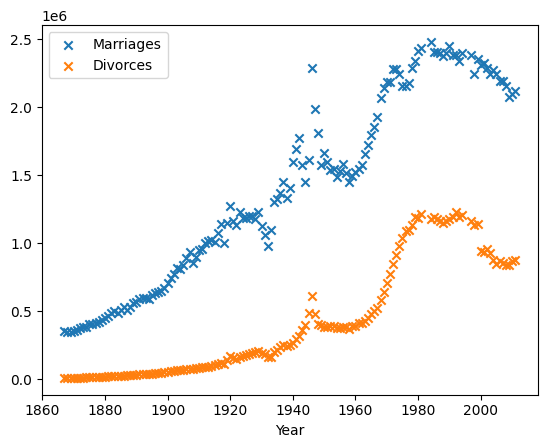

In [4]:
# plot marriages & divorces over time
plt.scatter(years, marriages, marker="x")
plt.scatter(years, divorces, marker="x")
plt.legend(("Marriages", "Divorces"))
plt.xlabel("Year")

## 2.3

In [5]:
# maximum of marriages per 1000 people
year = years[np.nanargmax(marriagesPerThousand)]
print("Maximum of marriages per 1000 people was %d." % year)
year = years[np.nanargmax(divorcesPerThousand)]
print("Maximum of divorces per 1000 people was %d." % year)

Maximum of marriages per 1000 people was 1946.
Maximum of divorces per 1000 people was 1979.


## 2.4 + 2.6

median: 9.600000
mean:   9.635461
std:    1.314466
nmad:   1.186400


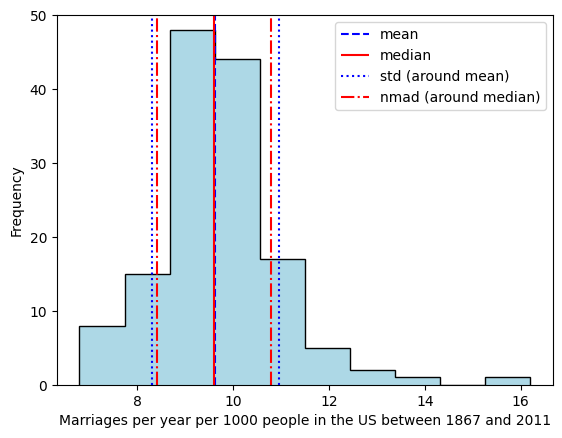

In [6]:
# remove nans
x = marriagesPerThousand
x = x[~np.isnan(x)]
# calculate statistics
median = np.median(x)
mean = np.mean(x)
std = np.std(x)
nmad = 1.483 * np.median(np.abs(x - median))
# print statistics
print("median: %f" % median)
print("mean:   %f" % mean)
print("std:    %f" % std)
print("nmad:   %f" % nmad)
# reproduce plot
plt.hist(x, histtype="stepfilled", color="lightblue")
plt.hist(x, histtype="step", color="black")
# create multiple line plot to use labels in legend creation
plt.vlines(mean, ymin=0, ymax=50, label="mean", colors="blue", linestyles="dashed")
plt.vlines(median, ymin=0, ymax=50, label="median", colors="red", linestyles="solid")
plt.vlines((mean-std, mean+std), ymin=0, ymax=50, label="std (around mean)", colors="blue", linestyles="dotted")
plt.vlines((median-nmad, median+nmad), ymin=0, ymax=50, label="nmad (around median)", colors="red", linestyles="dashdot")
plt.ylim(0,50)
plt.xlabel("Marriages per year per 1000 people in the US between %d and %d" % (years[0], years[-1]))
plt.ylabel("Frequency")
plt.legend()

## 2.5

In [7]:
popDuring1930s = population[(years>=1930) & (years<1940)]
popDuring2000s = population[(years>=2000) & (years<2010)]
print("Average US population per year")
print("1930-1939: %f" % np.nanmean(popDuring1930s))
print("2000-2009: %f" % np.nanmean(popDuring2000s))

Average US population per year
1930-1939: 126996200.000000
2000-2009: 294775600.000000
